In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scattertext as st
from spacy import load
nlp = load('en_core_web_md')

df = pd.read_table('data/facemasks.tsv').drop_duplicates()
df.set_index('id', verify_integrity=True, inplace=True)
df.head()

2023-04-20 17:00:48.134927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 17:00:49.231728: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-20 17:00:49.231792: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-20 17:00:49.231798: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

,abuseCount,customerNickname,helpfulNo,helpfulYes,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,...,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle,product_name,material,n_masks,brand,product_price
id,,,,,,,,,,,,,,,,,,,,,
05c2b17e-c28d-4792-930d-27e787d8d4ad,0,iHerb Customer,0,6,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,...,True,1.614071e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,iHerb Customer,0,0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,...,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
9a76e047-21e4-4da3-8b50-9d2396519b6b,0,iHerb Customer,0,0,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,...,False,1.612648e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
2890ac54-8707-418e-be3e-8d46231e3672,0,InnaIgorevna,0,0,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,...,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,iHerb Customer,0,0,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,...,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85


In [2]:
df['verdict'] = 'Bad'
df.loc[df['ratingValue'] >= 30, 'verdict'] = 'Good'

In [5]:
eng = df[df['languageCode'].str.startswith('en')]
eng['languageCode'].unique()

array(['en-US'], dtype=object)

In [7]:
eng = eng.copy()

In [8]:
eng['phrases'] = [list(doc.noun_chunks) for doc in nlp.pipe(eng['reviewText'].values)]

In [10]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

Text(0.5, 1.0, 'Nouns')

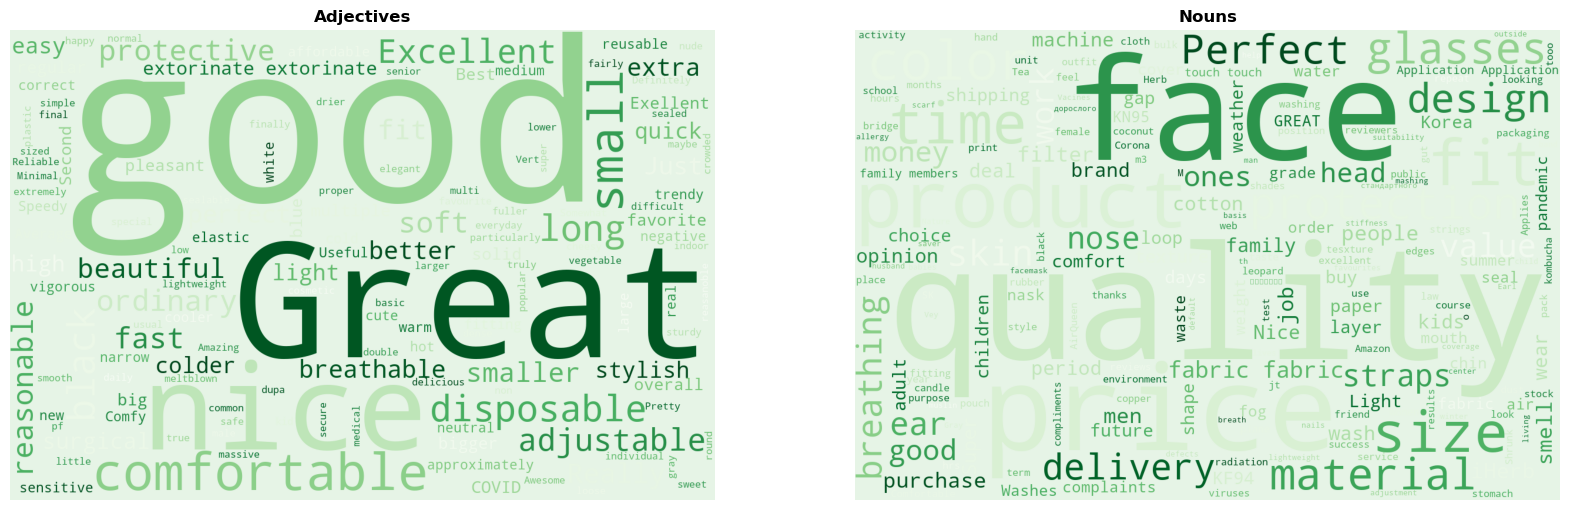

In [61]:
stop = ENGLISH_STOP_WORDS.union({'mask', 'masks'})
to_drop = ['AUX', 'CCONJ', 'INTJ', 'NUM', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'X']

ADJ_TAGS = {'ADJ', 'ADP', 'ADV'}
NOUN_TAGS = {'NOUN', 'PROPN'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 24))
pos_wc = WordCloud(stopwords=stop, width=1200, height=800, background_color='#e6f4e6', colormap=plt.cm.Greens)
pos_text = []
for phrases in eng[eng['verdict'] == 'Good']['phrases'].values:
    for phrase in phrases:
        words = [w for w in phrase if w.pos_ not in to_drop]
    pos_text.extend(words)

pos_adj_text = [p for p in pos_text if p.pos_ in ADJ_TAGS]
ax[0].imshow(pos_wc.generate(' '.join([w.text for w in pos_adj_text])))


pos_noun_text = [p for p in pos_text if p.pos_ in NOUN_TAGS]
ax[1].imshow(pos_wc.generate(' '.join([w.text for w in pos_noun_text])))
[k.set_axis_off() for k in ax.ravel()]
ax[0].set_title('Adjectives', weight='bold')
ax[1].set_title('Nouns', weight='bold')

# plt.suptitle('Customers value Comfort and Quality')

Text(0.5, 1.0, 'Nouns')

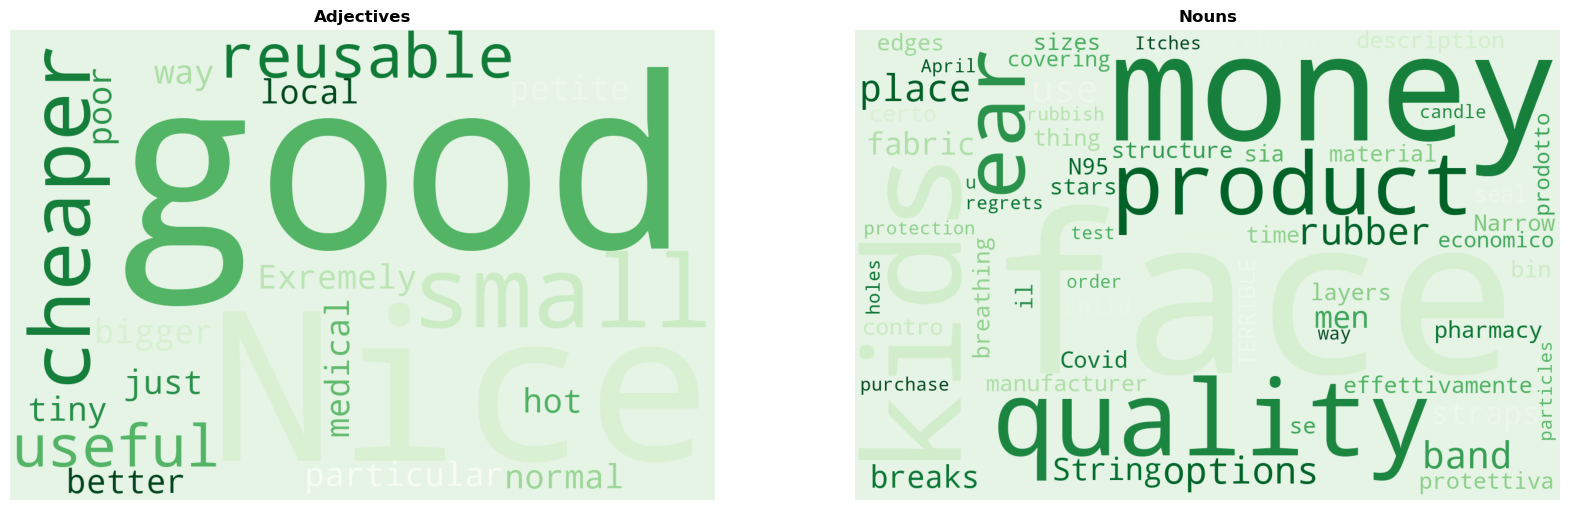

In [60]:
stop = ENGLISH_STOP_WORDS.union({'mask', 'masks'})
to_drop = ['AUX', 'CCONJ', 'INTJ', 'NUM', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'X']

ADJ_TAGS = {'ADJ', 'ADP', 'ADV'}
NOUN_TAGS = {'NOUN', 'PROPN'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 24))
neg_wc = WordCloud(stopwords=stop, width=1200, height=800, background_color='#e6f4e6', colormap=plt.cm.Greens)
neg_text = []
for phrases in eng[eng['verdict'] == 'Bad']['phrases'].values:
    for phrase in phrases:
        words = [w for w in phrase if w.pos_ not in to_drop]
    neg_text.extend(words)

neg_adj_text = [p for p in neg_text if p.pos_ in ADJ_TAGS]
ax[0].imshow(pos_wc.generate(' '.join([w.text for w in neg_adj_text])))


neg_noun_text = [p for p in neg_text if p.pos_ in NOUN_TAGS]
ax[1].imshow(neg_wc.generate(' '.join([w.text for w in neg_noun_text])))
[k.set_axis_off() for k in ax.ravel()]
ax[0].set_title('Adjectives', weight='bold')
ax[1].set_title('Nouns', weight='bold')

# plt.suptitle('Customers value Comfort and Quality')

In [62]:
# Scattertext

In [65]:
corp = st.CorpusFromParsedDocuments(eng, 'verdict', 'phrases')

id
05c2b17e-c28d-4792-930d-27e787d8d4ad    [(The, mask, quality), (the, color), (It), (my...
9a76e047-21e4-4da3-8b50-9d2396519b6b                                                   []
5fab014c-d839-4743-a343-cf03b7b168ce    [(a, small, face), (me), (it), (better, kid, s...
90e02dad-fcf3-4c40-b21c-6e7b12168ee6    [(The, Copper, fibers), (the, fabric), (steril...
72c1f16a-9c93-4b8a-961d-8ee4487c5c72                                                   []
                                                              ...                        
5d1c230a-24fe-4ac3-b498-7c7fd8d33f22    [(what), (I), (fairly, durable/), (warm, water...
a4a744fd-5443-439b-8576-c9adf0dd5a3d                                    [(Good, quality)]
03b4c0ee-232c-413c-a793-36678b07fdc0    [(Reasonable, honest, Compnay), (honest, price...
b5f22161-4b73-4d6b-bf19-badde1682c8d                                        [(Good, buy)]
66cb3271-f7a2-4b04-9874-b97a6393c7b6                                                   []
Name: p

In [67]:
eng['verdict']

id
05c2b17e-c28d-4792-930d-27e787d8d4ad    Good
9a76e047-21e4-4da3-8b50-9d2396519b6b    Good
5fab014c-d839-4743-a343-cf03b7b168ce    Good
90e02dad-fcf3-4c40-b21c-6e7b12168ee6    Good
72c1f16a-9c93-4b8a-961d-8ee4487c5c72    Good
                                        ... 
5d1c230a-24fe-4ac3-b498-7c7fd8d33f22    Good
a4a744fd-5443-439b-8576-c9adf0dd5a3d    Good
03b4c0ee-232c-413c-a793-36678b07fdc0    Good
b5f22161-4b73-4d6b-bf19-badde1682c8d    Good
66cb3271-f7a2-4b04-9874-b97a6393c7b6    Good
Name: verdict, Length: 1807, dtype: object